<a href="https://colab.research.google.com/github/shaimaa122/Weekend-Project_KNN-/blob/main/03_regression_weekend_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group members:
- Shaima Alharbi
- Ebtisam Alruhili
- Aljowhara Alblaihed

# Regressed Classification Weekend Project

### **Challenge Options**

#### Saudi Airbnb Price Prediction
- Data: [github.com/gumdropsteve/intro_to_machine_learning/tree/main/day_10/data](https://github.com/gumdropsteve/intro_to_machine_learning/tree/main/day_10/data)
- Data Dictionary: [github.com/gumdropsteve/intro_to_machine_learning/tree/main/day_10/data/README.MD](https://github.com/gumdropsteve/intro_to_machine_learning/tree/main/day_10/data/README.MD)
- Type: regression
- Starter code: [gist.github.com/gumdropsteve/c178891652838cb0663a4ef1d2eb9d14](https://gist.github.com/gumdropsteve/c178891652838cb0663a4ef1d2eb9d14)
- Target: `price`

#### Income Bracket Prediction
- Data: [archive.ics.uci.edu/ml/machine-learning-databases/adult/](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)
- Data Dictionary: [archive.ics.uci.edu/ml/datasets/Adult](https://archive.ics.uci.edu/ml/datasets/Adult)
- Type: classification
- Starter code: [gist.github.com/gumdropsteve/25e40b0ab0b5a6a7d51f11c00f91d0bb](https://gist.github.com/gumdropsteve/25e40b0ab0b5a6a7d51f11c00f91d0bb)
- Target: `target`

#### Mushroom
- Data: [archive.ics.uci.edu/ml/machine-learning-databases/mushroom/](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)
- Data Dictionary: [archive.ics.uci.edu/ml/datasets/mushroom](https://archive.ics.uci.edu/ml/datasets/mushroom)
- Type: classification
- Starter code: [colab.research.google.com/drive/1hIoS2jZCpVOCE4U2mxqkeYPLh2m6I8rA?usp=sharing](https://colab.research.google.com/drive/1hIoS2jZCpVOCE4U2mxqkeYPLh2m6I8rA?usp=sharing)
- Target: `target`

### **Available Models**
Pick from these models based on which challenge you take on (regression or classification). 

#### Regression
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

#### Classification
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## **Deleverables**
1. EDA
   - What is this data?
   - Visualize some relationships
   - What do you see? What did you find?
2. Data prep & `train_test_split()`
    - Make this data ready for a ML model
    - Decide which features to include
    - Split into training and testing datasets
3. Baseline model
    - What is your baseline model?
        - Explain what's going on please... Assume I'm an idiot 
4. Create a model
    - Compare your results to the baseline
5. Optimize your model
    - [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Bonus: [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Compare your results to the baseline
        - How did you do this? Why?
    - If you don't beat the baseline, try improving your model or using a different model
        - Were you able to beat the baseline? Why?

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

We use Saudi Airbnb Price Prediction **Jeddah**

In [3]:
jeddah_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_10/data/jeddah.parquet'

df =pd.read_parquet(jeddah_link)

We delete the dupicate values

In [4]:
df = df.drop(['ds', 'search_filter'], axis=1).drop_duplicates() 

In [5]:
len(df) #check the data length 

1874

In [6]:
df.sample(2)

,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
248,http://airbnb.com/rooms/36782649,استراحه سن شاين الفاخره,Entire bungalow,Jeddah,3.0,2.0,3.0,False,4.0,NaN,NaN,533.0,NaN,NaN,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
440,http://airbnb.com/rooms/45322619,شاليه سمر لاند (399 ريال فقط) للقسم,Private room,Jeddah,NaN,1.0,NaN,False,4.0,NaN,NaN,80.0,NaN,NaN,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe() 

,guests,bedrooms,beds,baths,half_baths,shared_baths,price,avg_rating,n_reviews
count,1170.000000,1874.000000,1170.000000,1605.000000,21.0,27.000000,1874.000000,934.000000,934.000000
mean,2.689744,1.509072,2.689744,1.898131,0.0,2.203704,417.053362,4.739540,18.065310
std,1.888323,1.084853,1.888323,1.375687,0.0,0.846478,1580.661347,0.321201,19.784883
min,0.000000,0.000000,0.000000,0.000000,0.0,1.500000,11.000000,3.330000,3.000000
25%,2.000000,1.000000,2.000000,1.000000,0.0,2.000000,57.000000,4.670000,5.000000
50%,2.000000,1.000000,2.000000,2.000000,0.0,2.000000,89.000000,4.820000,10.000000
75%,3.000000,2.000000,3.000000,2.000000,0.0,2.000000,184.000000,5.000000,23.000000
max,19.000000,10.000000,19.000000,14.000000,0.0,4.500000,10000.000000,5.000000,154.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 10046
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      1874 non-null   object 
 1   title                    1874 non-null   object 
 2   type                     1874 non-null   object 
 3   location                 1874 non-null   object 
 4   guests                   1170 non-null   float64
 5   bedrooms                 1874 non-null   float64
 6   beds                     1170 non-null   float64
 7   is_studio                1874 non-null   bool   
 8   baths                    1605 non-null   float64
 9   half_baths               21 non-null     float64
 10  shared_baths             27 non-null     float64
 11  price                    1874 non-null   float64
 12  avg_rating               934 non-null    float64
 13  n_reviews                934 non-null    float64
 14  gym_bool               

In [9]:
df.head()

,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
0,http://airbnb.com/rooms/47145509,Jeddah 28th Red sea view DAMAC Al Jawharah,Entire loft,Jeddah,NaN,1.0,NaN,False,1.5,NaN,NaN,343.0,5.00,12.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,http://airbnb.com/rooms/38256252,Apartment with fantastic sea and city view,Entire apartment,Jeddah,3.0,1.0,3.0,False,1.5,NaN,NaN,147.0,4.79,75.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,http://airbnb.com/rooms/47508856,High-rise Luxury Apartment With Stunning City ...,Entire condominium,Jeddah,2.0,2.0,2.0,False,2.0,NaN,NaN,147.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,http://airbnb.com/rooms/46711454,Stylish apartment in a great location,Entire apartment,Jeddah,2.0,2.0,2.0,False,1.0,NaN,NaN,70.0,4.71,7.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,http://airbnb.com/rooms/45720071,Luxury VIP SUITE Apartment (Private Building),Entire serviced apartment,Jeddah,2.0,1.0,2.0,False,1.0,NaN,NaN,92.0,4.90,21.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 1- EDA

#### Clean Data

Missing data



In [10]:
np.sum(df.isna()) #check if there is null values

url                           0
title                         0
type                          0
location                      0
guests                      704
bedrooms                      0
beds                        704
is_studio                     0
baths                       269
half_baths                 1853
shared_baths               1847
price                         0
avg_rating                  940
n_reviews                   940
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfront_bool               0
dishwasher_bool               0
beachfro

In [11]:
df.beds.unique() # check the beds unique values

array([nan,  3.,  2.,  4.,  0.,  5.,  6.,  7., 19.,  9.])

In [12]:
df.beds.value_counts()

2.0     481
3.0     273
4.0     187
0.0     134
5.0      56
6.0      23
19.0      7
7.0       7
9.0       2
Name: beds, dtype: int64

In [13]:
df['beds'] =df.beds.fillna(1) # We assume that each room contain at least one bed 

In [14]:
df.beds.unique()

array([ 1.,  3.,  2.,  4.,  0.,  5.,  6.,  7., 19.,  9.])

In [15]:
np.sum(df.isna()) #check the null values

url                           0
title                         0
type                          0
location                      0
guests                      704
bedrooms                      0
beds                          0
is_studio                     0
baths                       269
half_baths                 1853
shared_baths               1847
price                         0
avg_rating                  940
n_reviews                   940
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfront_bool               0
dishwasher_bool               0
beachfro

In [16]:
df.guests.unique() # check the guests unique values

array([nan,  3.,  2.,  4.,  0.,  5.,  6.,  7., 19.,  9.])

In [17]:
df[ 'guests']=df.guests.fillna(df.guests.median()) # replace the nan values of guest column by the median

In [18]:
df.guests.unique()

array([ 2.,  3.,  4.,  0.,  5.,  6.,  7., 19.,  9.])

In [19]:
np.sum(df.isna()) #check the null values

url                           0
title                         0
type                          0
location                      0
guests                        0
bedrooms                      0
beds                          0
is_studio                     0
baths                       269
half_baths                 1853
shared_baths               1847
price                         0
avg_rating                  940
n_reviews                   940
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfront_bool               0
dishwasher_bool               0
beachfro

In [20]:
df[ 'avg_rating']=df.avg_rating.fillna(df.avg_rating.median()) # replace the nan values of avg_rating column by the median

In [21]:
df[ 'n_reviews']=df.n_reviews.fillna(df.n_reviews.median()) # replace the nan values of n_reviews column by the median

In [22]:
np.sum(df.isna()) #check the null values

url                           0
title                         0
type                          0
location                      0
guests                        0
bedrooms                      0
beds                          0
is_studio                     0
baths                       269
half_baths                 1853
shared_baths               1847
price                         0
avg_rating                    0
n_reviews                     0
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfront_bool               0
dishwasher_bool               0
beachfro

The baths column is contain (full bath and half bath)     

In [23]:
df.baths.unique() 

array([ 1.5,  2. ,  1. ,  2.5,  nan,  5.5,  4. ,  6. ,  3. ,  3.5,  0. ,
        4.5,  8. ,  7.5,  5. , 14. ])

In [24]:
df['baths']=df.baths.fillna(df.baths.median()) # replace the nan values of baths column by the median

We assume that the half baths is found in baths column, so we decided to drop this column

In [25]:
df=df.drop(['half_baths'], axis=1) 

In [26]:
df.shared_baths.unique()

array([nan, 2. , 1.5, 4.5])

In [27]:
df['shared_baths']=df.shared_baths.fillna(df.shared_baths.median()) # replace the nan values of shared_baths column by the median

In [28]:
np.sum(df.isna()) #check the null values

url                        0
title                      0
type                       0
location                   0
guests                     0
bedrooms                   0
beds                       0
is_studio                  0
baths                      0
shared_baths               0
price                      0
avg_rating                 0
n_reviews                  0
gym_bool                   0
wifi_bool                  0
self_check_in_bool         0
air_conditioning_bool      0
pets_allowed_bool          0
indoor_fireplace_bool      0
hot_tub_bool               0
free_parking_bool          0
pool_bool                  0
kitchen_bool               0
breakfast_bool             0
elevator_bool              0
washer_bool                0
dryer_bool                 0
heating_bool               0
waterfront_bool            0
dishwasher_bool            0
beachfront_bool            0
ski_in_ski_out_bool        0
terrace_bool               0
sonos_sound_system_bool    0
bbq_grill_bool

In [29]:
len(df)

1874

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,guests,bedrooms,beds,is_studio,baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
guests,1.000000,0.566637,0.960639,-0.108698,0.565137,0.042977,0.081561,0.059219,-0.058265,-0.022441,-0.050921,-0.074635,-0.048252,-0.031688,-0.004597,0.060891,-0.023576,0.113129,-0.011618,0.016917,-0.025649,0.047976,0.029082,nan,0.156680,-0.000733,0.151888,nan,nan,nan,nan,nan,nan
bedrooms,0.566637,1.000000,0.637313,-0.480941,0.625908,0.022535,0.089585,0.096629,-0.128560,-0.079242,-0.114442,-0.077007,-0.019276,-0.016511,0.027921,0.018574,0.005337,0.094280,0.025178,0.018534,-0.089948,0.107591,0.073664,nan,0.127702,-0.031513,0.093935,nan,nan,nan,nan,nan,nan
beds,0.960639,0.637313,1.000000,-0.169651,0.558992,0.051041,0.065795,0.081206,-0.041340,-0.047034,-0.040143,-0.056412,-0.032170,-0.056082,0.010432,0.063981,-0.019943,0.128647,0.002030,0.008375,-0.081882,0.080813,0.045284,nan,0.144022,-0.010459,0.135411,nan,nan,nan,nan,nan,nan
is_studio,-0.108698,-0.480941,-0.169651,1.000000,-0.099836,-0.009886,0.010667,-0.122758,-0.036388,0.144784,0.143715,0.057020,-0.016785,-0.064119,-0.056637,-0.031049,-0.017267,0.001364,-0.019072,-0.044088,0.031203,-0.084170,-0.084332,nan,-0.025317,0.102253,-0.025317,nan,nan,nan,nan,nan,nan
baths,0.565137,0.625908,0.558992,-0.099836,1.000000,0.001960,0.079530,0.068813,-0.153319,0.043038,-0.090239,-0.179924,-0.052916,0.000551,-0.028168,0.050837,-0.081753,0.201956,0.002370,0.012079,-0.012977,0.039437,0.045247,nan,0.229373,0.039654,0.122949,nan,nan,nan,nan,nan,nan
shared_baths,0.042977,0.022535,0.051041,-0.009886,0.001960,1.000000,-0.007022,0.030737,-0.003617,-0.005758,-0.046160,-0.015654,0.008591,-0.006609,-0.004686,0.289216,0.039838,-0.007481,0.019989,-0.003648,-0.018039,-0.014970,-0.010511,nan,-0.002095,-0.002296,-0.002095,nan,nan,nan,nan,nan,nan
price,0.081561,0.089585,0.065795,0.010667,0.079530,-0.007022,1.000000,0.034691,-0.060693,-0.009408,0.102536,-0.110099,-0.004011,-0.024172,-0.032757,-0.019948,-0.094840,0.175634,-0.041118,-0.017277,-0.034021,0.025701,0.083997,nan,0.011043,-0.010248,0.000642,nan,nan,nan,nan,nan,nan
avg_rating,0.059219,0.096629,0.081206,-0.122758,0.068813,0.030737,0.034691,1.000000,0.047981,0.044061,0.040104,-0.029042,0.006245,0.026098,-0.075473,0.010966,-0.009768,0.015266,-0.047964,-0.002345,-0.033144,0.066925,0.006892,nan,0.012760,0.034912,0.007351,nan,nan,nan,nan,nan,nan
n_reviews,-0.058265,-0.128560,-0.041340,-0.036388,-0.153319,-0.003617,-0.060693,0.047981,1.000000,-0.064994,0.114841,0.159605,0.028158,-0.049697,-0.031291,-0.033916,0.019206,-0.057807,-0.009147,0.063612,-0.002654,0.007423,-0.011955,nan,-0.020262,-0.030034,-0.026311,nan,nan,nan,nan,nan,nan
gym_bool,-0.022441,-0.079242,-0.047034,0.144784,0.043038,-0.005758,-0.009408,0.044061,-0.064994,1.000000,0.067015,-0.110195,0.093480,-0.021380,-0.032989,-0.018085,-0.103818,-0.041395,-0.074984,0.018269,0.295005,0.042300,-0.005850,nan,0.060965,0.156716,0.023109,nan,nan,nan,nan,nan,nan


We noticed that there is false values but represent in the data as nan values, and we decide to delete these Columns.

In [31]:
df.ski_in_ski_out_bool.value_counts() # all the column contain false values

False    1874
Name: ski_in_ski_out_bool, dtype: int64

In [32]:
df=df.drop(['heating_bool','ski_in_ski_out_bool','terrace_bool','sonos_sound_system_bool','bbq_grill_bool','hair_dryer_bool','chefs_kitchen_bool'],axis=1)

In [33]:
df.sample(3)

,url,title,type,location,guests,bedrooms,beds,is_studio,baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,waterfront_bool,dishwasher_bool,beachfront_bool
223,http://airbnb.com/rooms/43140573,"Ascott Tahlia Jeddah, 1 Bedroom Executive",Entire serviced apartment,Jeddah,2.0,1.0,1.0,False,1.0,2.0,9864.0,4.82,10.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1951,http://airbnb.com/rooms/46958879,Arabian Nights home with a Massage chair,Entire apartment,Jeddah,2.0,1.0,1.0,False,1.0,2.0,53.0,4.82,10.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3796,http://airbnb.com/rooms/21801641,Johart Alwafa 2,Room,serviced apartment,2.0,1.0,2.0,False,2.0,2.0,26.0,4.82,10.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Visualize:

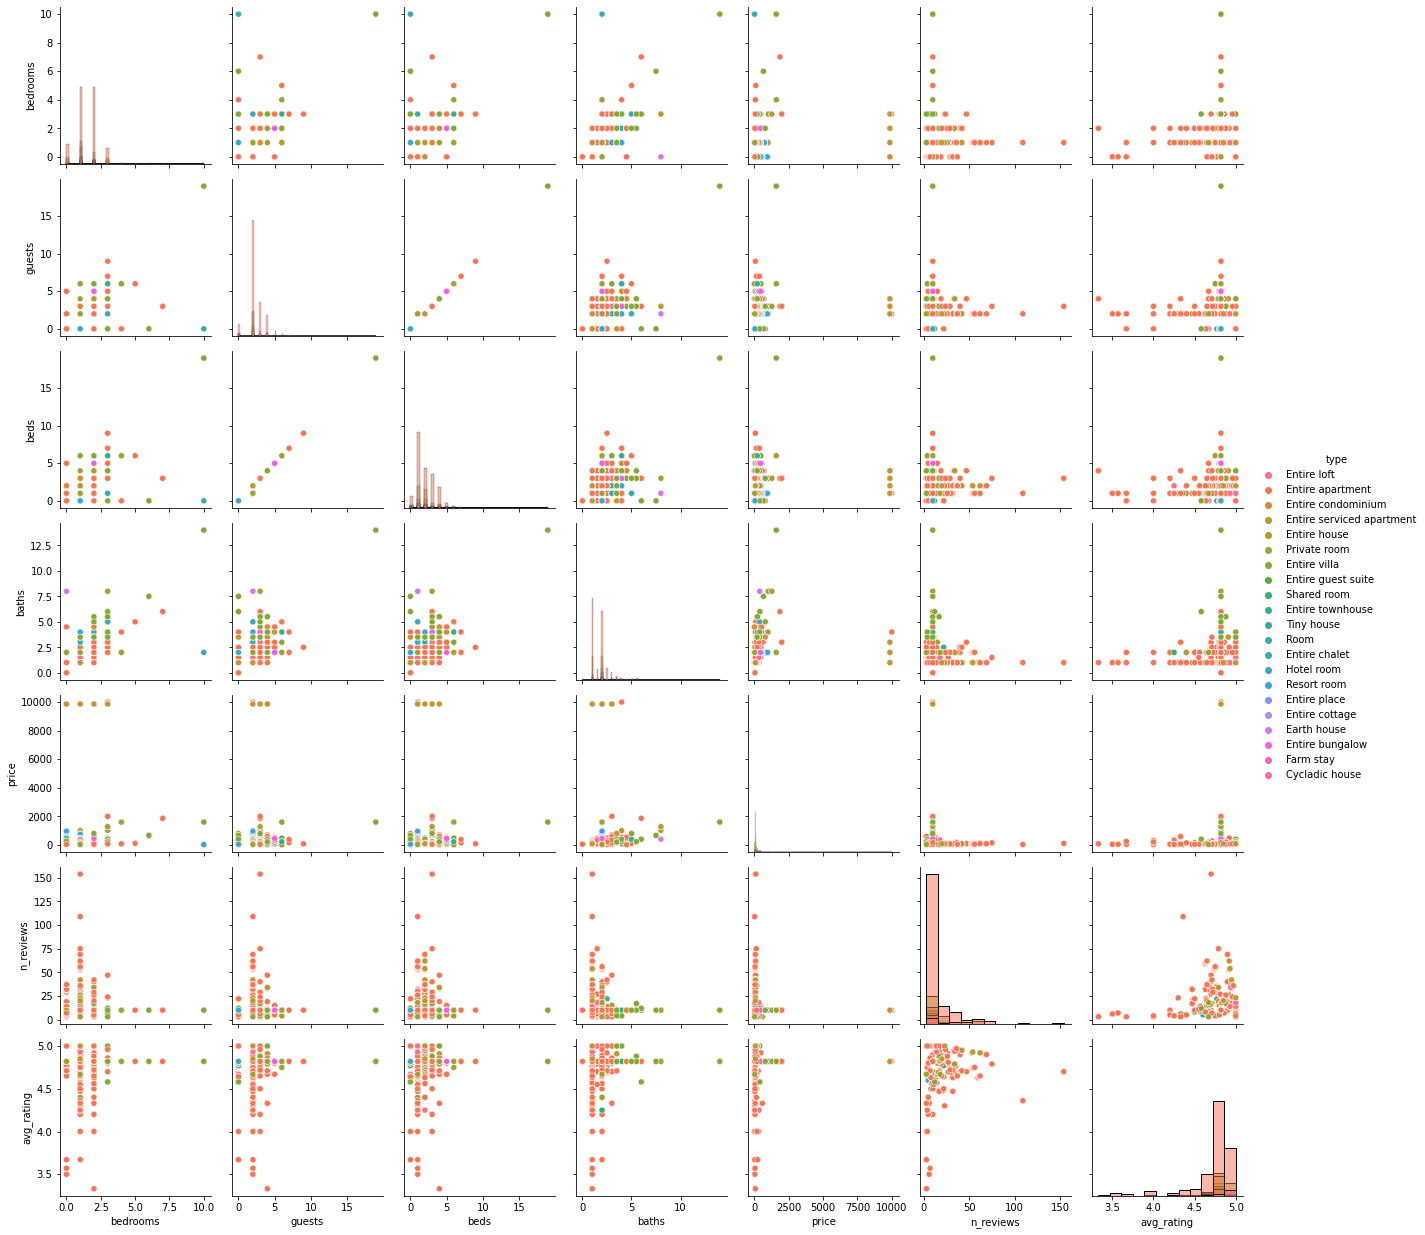

In [34]:
g = sns.PairGrid(df[['bedrooms','guests','beds','baths','price','n_reviews','avg_rating','type']],hue="type")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [35]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,guests,bedrooms,beds,is_studio,baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,waterfront_bool,dishwasher_bool,beachfront_bool
guests,1.000000,0.566637,0.960639,-0.108698,0.565137,0.042977,0.081561,0.059219,-0.058265,-0.022441,-0.050921,-0.074635,-0.048252,-0.031688,-0.004597,0.060891,-0.023576,0.113129,-0.011618,0.016917,-0.025649,0.047976,0.029082,0.156680,-0.000733,0.151888
bedrooms,0.566637,1.000000,0.637313,-0.480941,0.625908,0.022535,0.089585,0.096629,-0.128560,-0.079242,-0.114442,-0.077007,-0.019276,-0.016511,0.027921,0.018574,0.005337,0.094280,0.025178,0.018534,-0.089948,0.107591,0.073664,0.127702,-0.031513,0.093935
beds,0.960639,0.637313,1.000000,-0.169651,0.558992,0.051041,0.065795,0.081206,-0.041340,-0.047034,-0.040143,-0.056412,-0.032170,-0.056082,0.010432,0.063981,-0.019943,0.128647,0.002030,0.008375,-0.081882,0.080813,0.045284,0.144022,-0.010459,0.135411
is_studio,-0.108698,-0.480941,-0.169651,1.000000,-0.099836,-0.009886,0.010667,-0.122758,-0.036388,0.144784,0.143715,0.057020,-0.016785,-0.064119,-0.056637,-0.031049,-0.017267,0.001364,-0.019072,-0.044088,0.031203,-0.084170,-0.084332,-0.025317,0.102253,-0.025317
baths,0.565137,0.625908,0.558992,-0.099836,1.000000,0.001960,0.079530,0.068813,-0.153319,0.043038,-0.090239,-0.179924,-0.052916,0.000551,-0.028168,0.050837,-0.081753,0.201956,0.002370,0.012079,-0.012977,0.039437,0.045247,0.229373,0.039654,0.122949
shared_baths,0.042977,0.022535,0.051041,-0.009886,0.001960,1.000000,-0.007022,0.030737,-0.003617,-0.005758,-0.046160,-0.015654,0.008591,-0.006609,-0.004686,0.289216,0.039838,-0.007481,0.019989,-0.003648,-0.018039,-0.014970,-0.010511,-0.002095,-0.002296,-0.002095
price,0.081561,0.089585,0.065795,0.010667,0.079530,-0.007022,1.000000,0.034691,-0.060693,-0.009408,0.102536,-0.110099,-0.004011,-0.024172,-0.032757,-0.019948,-0.094840,0.175634,-0.041118,-0.017277,-0.034021,0.025701,0.083997,0.011043,-0.010248,0.000642
avg_rating,0.059219,0.096629,0.081206,-0.122758,0.068813,0.030737,0.034691,1.000000,0.047981,0.044061,0.040104,-0.029042,0.006245,0.026098,-0.075473,0.010966,-0.009768,0.015266,-0.047964,-0.002345,-0.033144,0.066925,0.006892,0.012760,0.034912,0.007351
n_reviews,-0.058265,-0.128560,-0.041340,-0.036388,-0.153319,-0.003617,-0.060693,0.047981,1.000000,-0.064994,0.114841,0.159605,0.028158,-0.049697,-0.031291,-0.033916,0.019206,-0.057807,-0.009147,0.063612,-0.002654,0.007423,-0.011955,-0.020262,-0.030034,-0.026311
gym_bool,-0.022441,-0.079242,-0.047034,0.144784,0.043038,-0.005758,-0.009408,0.044061,-0.064994,1.000000,0.067015,-0.110195,0.093480,-0.021380,-0.032989,-0.018085,-0.103818,-0.041395,-0.074984,0.018269,0.295005,0.042300,-0.005850,0.060965,0.156716,0.023109


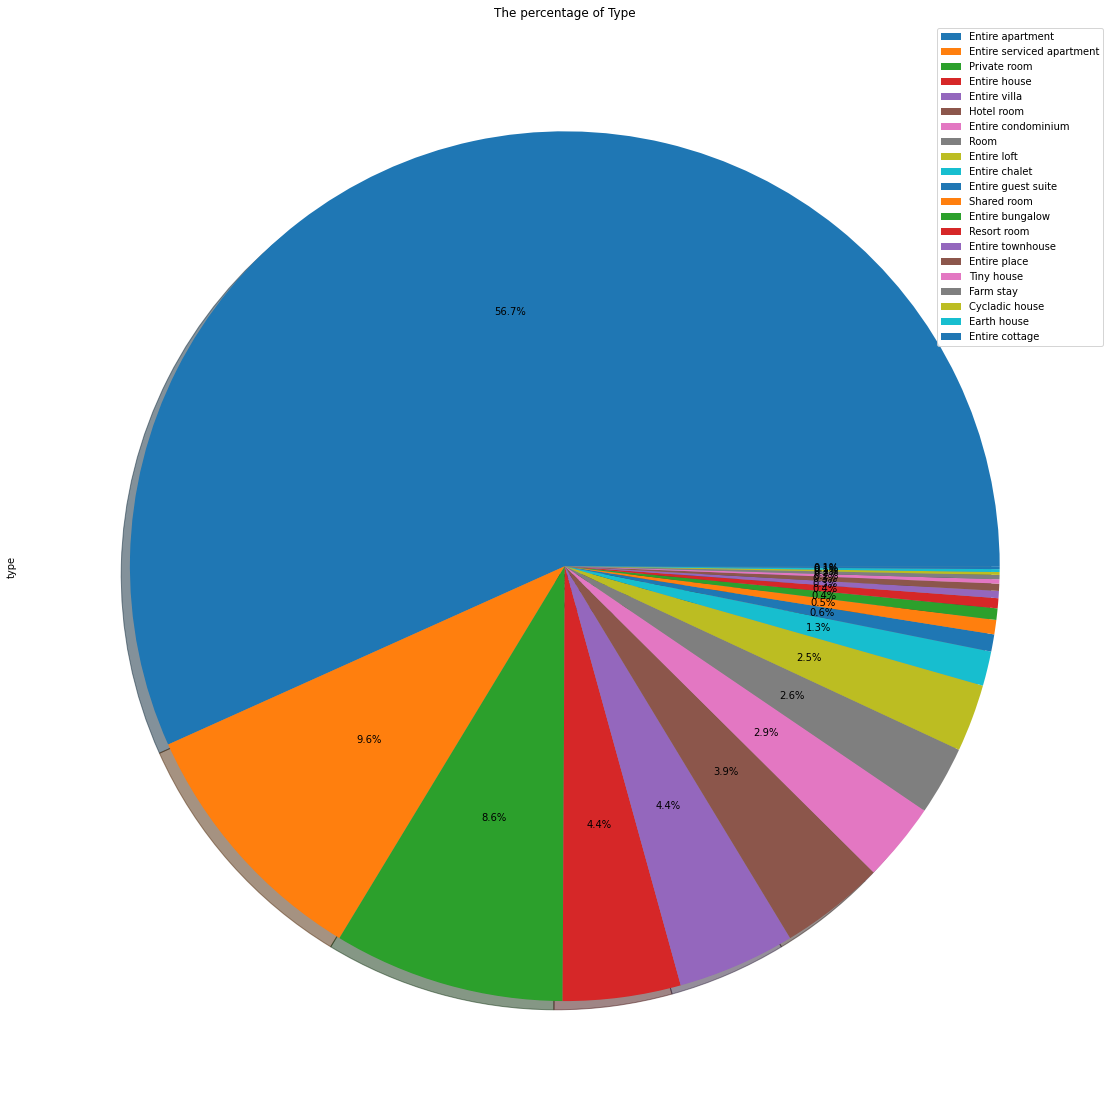

In [36]:
f,ax=plt.subplots(figsize=(20,20))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', subplots=True, labeldistance=None, legend=True,shadow=True)
ax.set_title('The percentage of Type')
plt.show()

Text(0.5, 1.0, 'Histogram of Price')

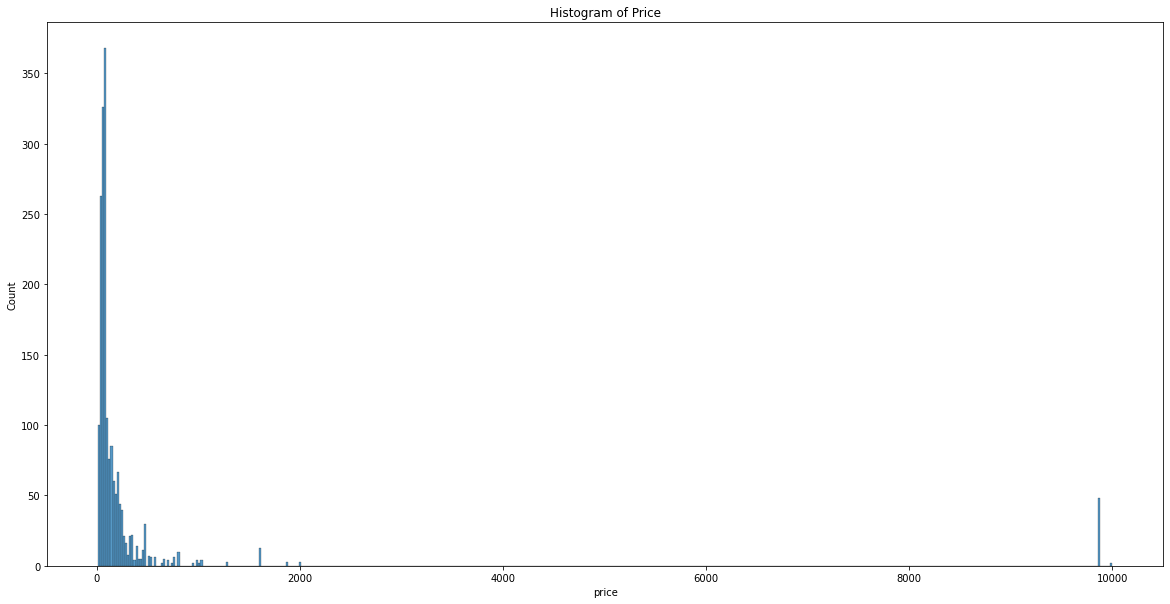

In [37]:
fig, ax = pyplot.subplots(figsize=(20, 10))
sns.histplot(ax=ax,data=df, x="price").set_title('Histogram of Price')

#### Extract Features:

We replace all boolean columns values from true to 1 and false to 0

In [38]:
df=df.replace({True:1, False:0})   

We extratc catageroical columns

In [39]:
df=pd.get_dummies(df.drop(['url','title','location'],axis=1))

In [40]:
df.sample(2)

,guests,bedrooms,beds,is_studio,baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,waterfront_bool,dishwasher_bool,beachfront_bool,type_Cycladic house,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire condominium,type_Entire cottage,type_Entire guest suite,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Resort room,type_Room,type_Shared room,type_Tiny house
534,5.0,2.0,5.0,0,3.0,2.0,279.0,4.82,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
933,0.0,1.0,0.0,0,1.0,2.0,56.0,4.64,22.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Conclusion:
- we noticed that the most Type is Entire apartment.
- Most of peoples pied less than 2000 RS for most types 9000 for Entire serviced apartment type.
- The price based on guests,	bedrooms,	beds and many services.



### Data prep & train_test_split()

In [41]:
df.head(1)

,guests,bedrooms,beds,is_studio,baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,waterfront_bool,dishwasher_bool,beachfront_bool,type_Cycladic house,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire condominium,type_Entire cottage,type_Entire guest suite,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Resort room,type_Room,type_Shared room,type_Tiny house
0,2.0,1.0,1.0,0,1.5,2.0,343.0,5.0,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(df[['price']],axis=1)
y = df.price

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=3)

In [43]:
len(X_train),len(y_train)

(1405, 1405)

In [44]:
len(X_test),len(y_test)

(469, 469)

In [45]:
X.head()

,guests,bedrooms,beds,is_studio,baths,shared_baths,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,waterfront_bool,dishwasher_bool,beachfront_bool,type_Cycladic house,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire condominium,type_Entire cottage,type_Entire guest suite,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Resort room,type_Room,type_Shared room,type_Tiny house
0,2.0,1.0,1.0,0,1.5,2.0,5.00,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3.0,1.0,3.0,0,1.5,2.0,4.79,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,2.0,0,2.0,2.0,4.82,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,2.0,0,1.0,2.0,4.71,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,2.0,0,1.0,2.0,4.90,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
y.head()

0    343.0
1    147.0
2    147.0
3     70.0
4     92.0
Name: price, dtype: float64

### Baseline model



The baseline is predict a mean value for price.

In [47]:
def baseline_model(n_predictions, value_to_predict):
  
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)   
baseline_value = np.mean(y_train)   

baseline_model(n_predictions, baseline_value)

0      428.476868
1      428.476868
2      428.476868
3      428.476868
4      428.476868
          ...    
464    428.476868
465    428.476868
466    428.476868
467    428.476868
468    428.476868
Length: 469, dtype: float64

In [48]:
baseline_preds = baseline_model(n_predictions, baseline_value)

compute the R2 score for baseline model.

In [51]:
baseline_r2_score=r2_score(y_test, baseline_preds)

In [52]:
baseline_r2_score 

-0.0009434478696275228

**The baseline is a simple model that predict results based on the dataset, these predictions uses to measure the basline performence, if the score of the basline model is does not good, we create a model (knn) in order to get a better result and score from basline model.**

**Our basline score is -0 , after we fit GridSearch  we get score that is better**

### Create a model

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

preds_k=knn.predict(X_test)


In [54]:
preds_k

array([ 280.4,  246. ,   70.2, 1599.2,  149. ,   78.8,   50.4,  447.6,
         77.6,   56.6,   55.4, 7984. ,  165.8,   48.2,  173.8,   27.8,
        177. ,   95. ,   97.6,  175.4,  105.8,   53.8,   13.2,  313.2,
        549.4,  175.8,  132. ,  108.2,  165.2,  105.8,   67.2,   69.2,
        246.8,   66. ,   81. ,   81.4,  154.8,  104.4,  119.2,  124.6,
         58.2,  126.4,  105.2,  118.2,   44.8,  251.4,  107.6,   88. ,
         45.4,  253.2,  176.8,  193.4,  141.2,   89.4,   63. , 2044.2,
       2047.2,   69. ,  210.4,  129.2, 7901.6,   87.2,  101.6,   85. ,
        219.6,   71.4,  132. ,  131.4,   97.6,  702.4,   33.6,   66. ,
         55.2,  112.4,  222.6,   90.2,   78.6,  242. ,   68.8,   58.4,
         48.4,   67.2,   83.6,   50.6,  500.6, 2349.4,  118.2,   83.6,
        241. ,  398.2,  108.2,   60.6,  116.4,  158.4,   80.8,   88. ,
         29. ,   88.8,  113.4, 3978.8,   67.6,   66.4,  100.6,  125.2,
        415. ,  123.8,   89. ,   27.8,  102.4,   97.6,   96.6,  129. ,
      

compute the R2 score for KNN model.

In [57]:
preds_score_k=r2_score(y_test, preds_k)  
preds_score_k #Best possible score is 1.0 

0.81114528476841

### Optimize your model

In [58]:
from sklearn.model_selection import GridSearchCV

p_grid = {'metric': ['manhattan', 'minkowski'],
          'weights': ['uniform', 'distance'],
           'n_jobs':[1]}

grid = GridSearchCV(KNeighborsRegressor(), p_grid)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['manhattan', 'minkowski'], 'n_jobs': [1],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The best params

In [60]:
grid.best_params_

{'metric': 'manhattan', 'n_jobs': 1, 'weights': 'distance'}

We take the best parms to improve the model.

In [61]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(metric='manhattan', n_jobs=1, weights='distance')

knn.fit(X_train, y_train)

preds_k_grid=knn.predict(X_test)

compute the R2 score for KNN with best parms .

In [62]:
preds_score_grid_k=r2_score(y_test, preds_k_grid)  
preds_score_grid_k 

0.9010013560501231

### Compare between the Baseline , KNN and KNN GridSerchCV

In [63]:
print('Comparing models score:')
print('Baseline score:',baseline_r2_score)
print('Knn score:',preds_score_k)
print('Knn Grid score:',preds_score_grid_k)

Comparing models score:
Baseline score: -0.0009434478696275228
Knn score: 0.81114528476841
Knn Grid score: 0.9010013560501231


We optimize the model score from 0.8111 to 0.90100 .

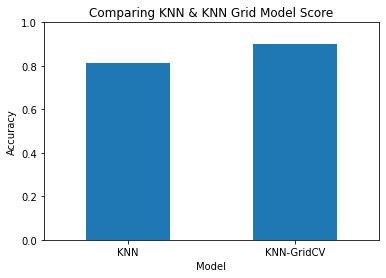

In [64]:
pd.DataFrame([ preds_score_k, preds_score_grid_k]).plot.bar()
plt.xticks(np.arange(2),('KNN','KNN-GridCV'))
plt.legend().remove()
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing KNN & KNN Grid Model Score');

How the final model suitable with data.

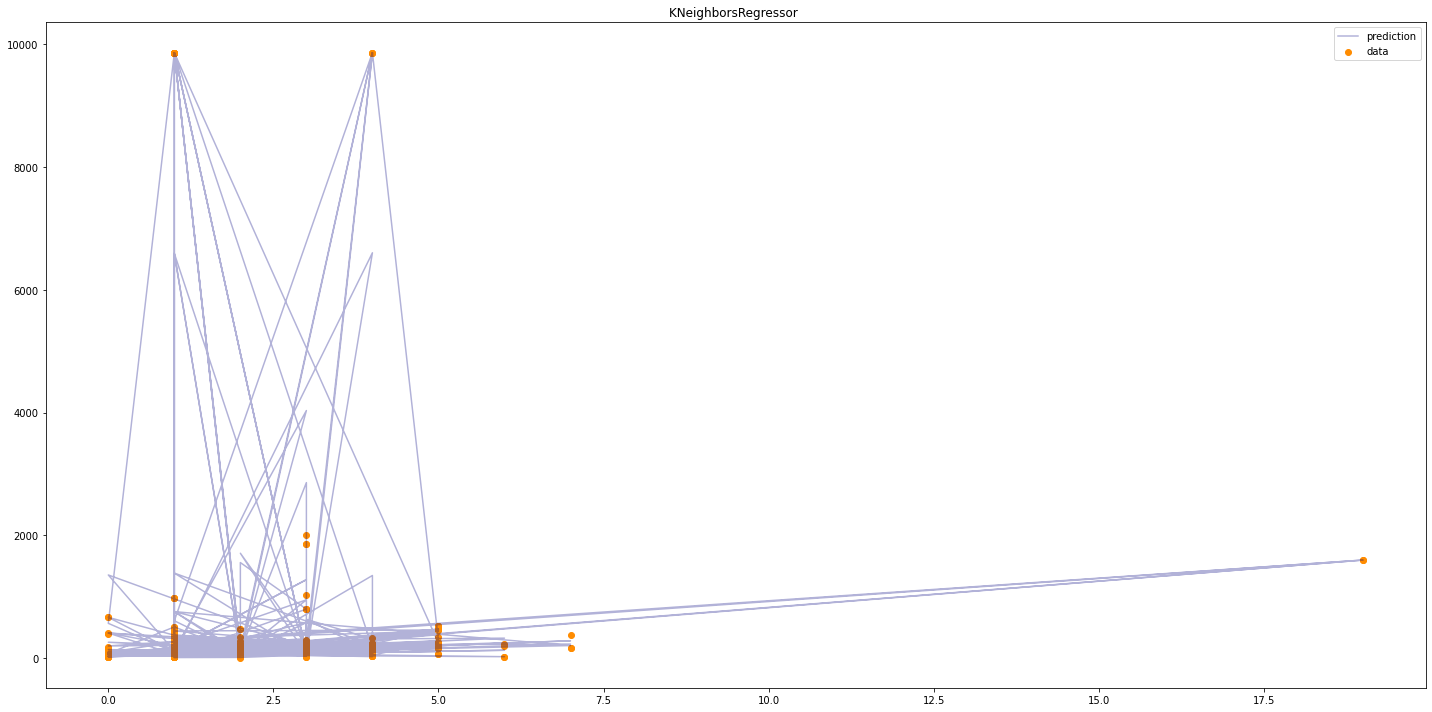

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(X_test.beds, y_test, color='darkorange', label='data')
plt.plot(X_test.beds,preds_k_grid, color='navy', label='prediction',alpha=0.3)
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor ")

plt.tight_layout()
plt.show()
